In [ ]:
!pip install python-igraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.6 MB/s eta 0:00:00


In [ ]:
import igraph as ig
import pandas as pd

# Load node and edge data from CSV files
node_df = pd.read_csv('/content/longitudeandlatitude - longitudeandlatitude.csv')
edge_df = pd.read_csv('/content/monument_edges.csv')

# Extract node IDs and labels
node_ids = node_df['ID'].tolist()
node_labels = node_df['Label'].tolist()

# Adjust the node IDs to start from 0
adjusted_node_ids = [node_id - 1 for node_id in node_ids]

# Create an empty graph with adjusted node IDs
graph = ig.Graph(directed=False)
graph.add_vertices(adjusted_node_ids)
graph.vs['label'] = node_labels

# Extract edge pairs as tuples from the edge DataFrame
edge_pairs = list(zip(edge_df['Source'], edge_df['Target']))

# Adjust the edge pairs to use adjusted node IDs
adjusted_edge_pairs = [(source - 1, target - 1) for source, target in edge_pairs]

# Add edges to the graph with adjusted node IDs
graph.add_edges(adjusted_edge_pairs)

# Calculate degree centrality
degree_centrality = graph.degree()

# Calculate betweenness centrality
betweenness_centrality = graph.betweenness()

# Calculate closeness centrality
closeness_centrality = graph.closeness(normalized=True)

# Calculate eigenvalue centrality
eigen_centrality = graph.evcent()

centrality_measures = {
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvalue Centrality': eigen_centrality,
}

for node_label in node_labels:
    print("Node Label:", node_label)
    node_index = graph.vs.find(label=node_label).index
    for name, values in centrality_measures.items():
        print(name, values[node_index])
    print()

Node Label: Air Force Museum
Degree Centrality 3
Betweenness Centrality 0.13942307692307693
Closeness Centrality 0.46875
Eigenvalue Centrality 0.06326391622449744

Node Label: Akshardham Temple
Degree Centrality 2
Betweenness Centrality 0.07692307692307693
Closeness Centrality 0.4639175257731959
Eigenvalue Centrality 0.04544329800813644

Node Label: Chattarpur Temple
Degree Centrality 3
Betweenness Centrality 0.5833333333333333
Closeness Centrality 0.4205607476635514
Eigenvalue Centrality 0.032705805334387016

Node Label: Connaught Place
Degree Centrality 31
Betweenness Centrality 3.0354478669960403
Closeness Centrality 0.7142857142857143
Eigenvalue Centrality 0.938055477858069

Node Label: Craft Museum
Degree Centrality 31
Betweenness Centrality 5.183604208405756
Closeness Centrality 0.7142857142857143
Eigenvalue Centrality 0.9211209247208639

Node Label: Delhi Zoo
Degree Centrality 33
Betweenness Centrality 5.584692583632062
Closeness Centrality 0.7377049180327869
Eigenvalue Centrali

In [ ]:
for centrality_name, centrality_values in centrality_measures.items():
    print(f"--- Top 5 nodes based on {centrality_name} ---")
    sorted_nodes = sorted(graph.vs, key=lambda v: centrality_values[v.index], reverse=True)[:5]
    i = 1
    for node in sorted_nodes:
        node_label = node['label']
        node_index = node.index
        centrality_value = centrality_values[node_index]
        print(f"{i}. Node {node_label} (ID {node_index}) - {centrality_name}: {centrality_value:.2f}")
        i += 1
    print()


--- Top 5 nodes based on Degree Centrality ---
1. Node Amrit Udyan (ID 24) - Degree Centrality: 36.00
2. Node National Gallery of Modern Art (ID 25) - Degree Centrality: 36.00
3. Node Jhandewalan Mandir (ID 18) - Degree Centrality: 35.00
4. Node India Gate Monument (ID 13) - Degree Centrality: 34.00
5. Node Jantar Mantar (ID 17) - Degree Centrality: 34.00

--- Top 5 nodes based on Betweenness Centrality ---
1. Node Jhandewalan Mandir (ID 18) - Betweenness Centrality: 132.62
2. Node Bharat Darshan Park (ID 45) - Betweenness Centrality: 86.00
3. Node Delhi Haat -INA (ID 6) - Betweenness Centrality: 52.12
4. Node National Gallery of Modern Art (ID 25) - Betweenness Centrality: 49.48
5. Node Delhi Haat- Pritampura (ID 7) - Betweenness Centrality: 44.00

--- Top 5 nodes based on Closeness Centrality ---
1. Node Jhandewalan Mandir (ID 18) - Closeness Centrality: 0.80
2. Node Amrit Udyan (ID 24) - Closeness Centrality: 0.79
3. Node National Gallery of Modern Art (ID 25) - Closeness Centrality

In [ ]:

min_degree_centrality = min(degree_centrality)
max_degree_centrality = max(degree_centrality)

# Normalize the degree centrality values using Min-Max normalization
normalized_degree_centrality = [(value - min_degree_centrality) / (max_degree_centrality - min_degree_centrality) for value in degree_centrality]


# Create a dictionary to store the centrality measures for each node (including the normalized degree centrality and betweenness centrality)

centrality_data = pd.DataFrame({
    'Node ID': node_ids,
    'Node Label': node_labels,
   'Degree Centrality': normalized_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvalue Centrality': eigen_centrality,
})

output_filename = 'Unweighted_centralities_output.csv'
centrality_data.to_csv(output_filename, index=False)

print("Centrality data saved to:", output_filename)

Centrality data saved to: Unweighted_centralities_output.csv


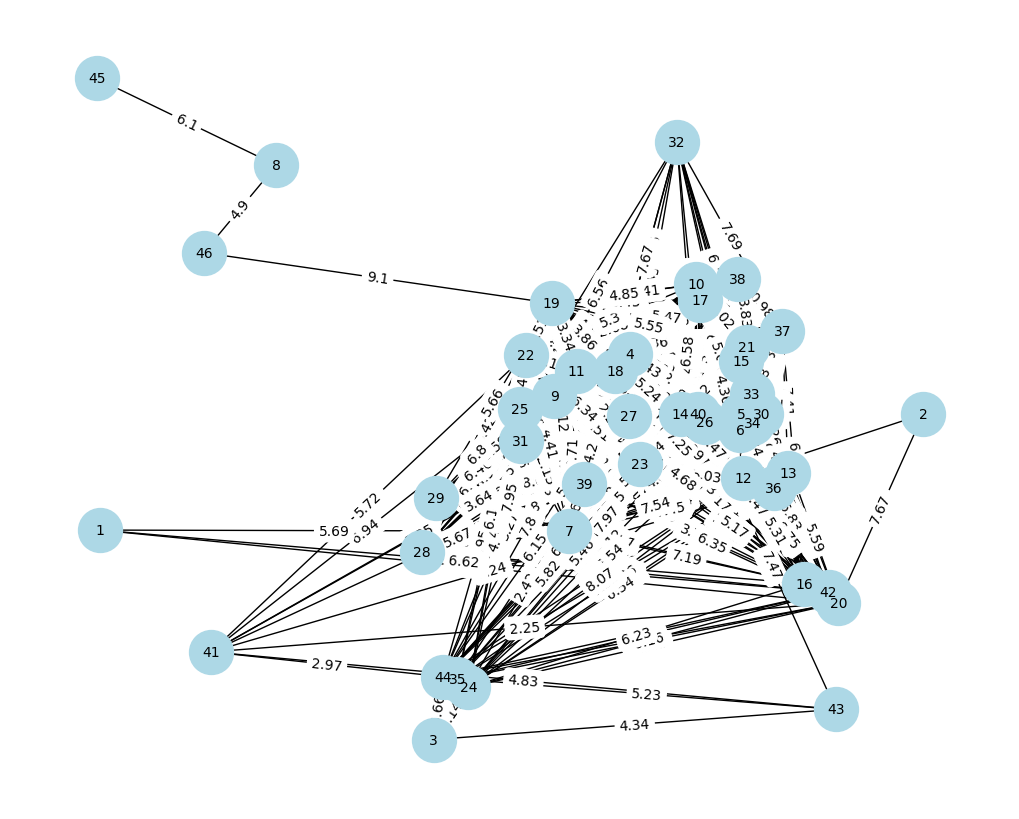

In [ ]:
#Graph plot

import networkx as nx

edge_df['Weight'] = pd.to_numeric(edge_df['Weight'])

# Modify the node indices to start from 1 instead of 0
node_df['NodeId'] = node_df.index + 1

# Create a NetworkX graph
nx_graph = nx.from_pandas_edgelist(edge_df, 'Source', 'Target', edge_attr='Weight')

# Create a dictionary to map node IDs to their longitude and latitude
node_positions = {row['NodeId']: (row['Longitude'], row['Latitude']) for _, row in node_df.iterrows()}

# Draw the graph using geographic positions
plt.figure(figsize=(10, 8))
nx.draw(nx_graph, pos=node_positions, with_labels=True, node_color='lightblue', node_size=1000, font_size=10)
labels = nx.get_edge_attributes(nx_graph, 'Weight')
nx.draw_networkx_edge_labels(nx_graph, pos=node_positions, edge_labels=labels)
plt.show()

